In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import metrics

In [2]:
colNames = ['Elevation', 
            'Aspect', 
            'Slope',
            'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'illshade_9am',
            'Hillshade_Noon',
            'Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points',
            'Wilderness_Area1',
            'Wilderness_Area2',
            'Wilderness_Area3',
            'Wilderness_Area4']

for i in range(40):
    colNames.append('Soil_Type'+ str(i+1))
colNames.append('Cover_Type')

In [3]:
def normalize(matrix):
    return (matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))

def standarize(matrix):
    return (matrix - np.mean(matrix))/(np.std(matrix))

In [4]:
df = pd.read_csv("covtype.data", names = colNames)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,illshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Zbiór danych posiada 55 kolum gdzie pierwsze 10 kolumn zaweirają dane liczobe z pewnych przediałów natomiast pozostałe kolumny sa do dane kategoryczne.
    
    12 cech/atrybutów
    7 klas

In [5]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
illshade_9am                          0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [6]:
dfToNorm = df[['Elevation', 
            'Aspect', 
            'Slope',
            'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'illshade_9am',
            'Hillshade_Noon',
            'Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points',]]

colNamesNoNorm = ['Wilderness_Area1',
            'Wilderness_Area2',
            'Wilderness_Area3',
            'Wilderness_Area4']
for i in range(40):
    colNamesNoNorm.append('Soil_Type'+ str(i+1))
colNamesNoNorm.append('Cover_Type')

noNorm = df[colNamesNoNorm]

In [7]:
normalizedDataNp = normalize(dfToNorm.to_numpy())
noNormNp  = noNorm.to_numpy()
data = np.concatenate((normalizedDataNp, noNormNp), axis=1)

y = data[:,-1]
X = data[:,[i for i in range(len(data[0]) - 1)]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=244828)

In [8]:
classNames = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
for i in range(7):
    print(classNames[i],"=>" ,np.count_nonzero(y == (i+1)))

Spruce/Fir => 211840
Lodgepole Pine => 283301
Ponderosa Pine => 35754
Cottonwood/Willow => 2747
Aspen => 9493
Douglas-fir => 17367
Krummholz => 20510


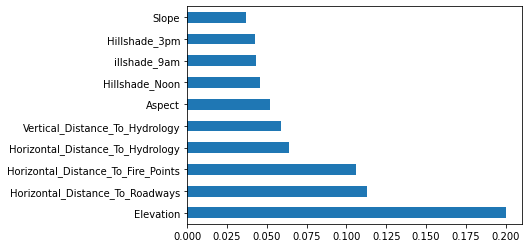

In [9]:
X = df.iloc[:,0:53]
y = df.iloc[:,-1]    
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
best = [colNames.index('Elevation'),
        colNames.index('Horizontal_Distance_To_Roadways'),
        colNames.index('Horizontal_Distance_To_Fire_Points')]

In [11]:
X_train_best = X_train[:,best]
X_test_best = X_test[:,best]

# NN best

In [12]:
nNeigh = KNeighborsClassifier(n_neighbors=1)
nNeigh.fit(X_train_best, y_train)
nNeighPred = nNeigh.predict(X_test_best)
my_acc = metrics.accuracy_score(nNeighPred, y_test)
my_bAcc = metrics.balanced_accuracy_score(nNeighPred, y_test)
print(f'Accuracy          |{my_acc}')
print(f'bAccuracy         |{my_bAcc}')

Accuracy          |0.7777940328562946
bAccuracy         |0.6548687534768435


# kNN best

In [13]:
kNeigh = KNeighborsClassifier(n_neighbors=7)
kNeigh.fit(X_train_best, y_train)
kNeighPred = kNeigh.predict(X_test_best)
my_acc = metrics.accuracy_score(kNeighPred, y_test)
my_bAcc = metrics.balanced_accuracy_score(kNeighPred, y_test)
print(f'Accuracy          |{my_acc}')
print(f'bAccuracy         |{my_bAcc}')

Accuracy          |0.8294536285638064
bAccuracy         |0.7622527587704534


# NM best

In [14]:
nM = NearestCentroid()
nM.fit(X_train_best, y_train)
nMPred = nM.predict(X_test_best)
my_acc = metrics.accuracy_score(nMPred, y_test)
my_bAcc = metrics.balanced_accuracy_score(nMPred, y_test)
print(f'Accuracy          |{my_acc}')
print(f'bAccuracy         |{my_bAcc}')

Accuracy          |0.1912084885932377
bAccuracy         |0.19750217690646488


# NN all

In [15]:
nNeigh = KNeighborsClassifier(n_neighbors=1)
nNeigh.fit(X_train, y_train)
nNeighPred = nNeigh.predict(X_test)
my_acc = metrics.accuracy_score(nNeighPred, y_test)
my_bAcc = metrics.balanced_accuracy_score(nNeighPred, y_test)
print(f'Accuracy          |{my_acc}')
print(f'bAccuracy         |{my_bAcc}')

Accuracy          |0.9685722399593815
bAccuracy         |0.9459197304154027


# kNN all

In [16]:
kNeigh = KNeighborsClassifier(n_neighbors=7)
kNeigh.fit(X_train, y_train)
kNeighPred = kNeigh.predict(X_test)
my_acc = metrics.accuracy_score(kNeighPred, y_test)
my_bAcc = metrics.balanced_accuracy_score(kNeighPred, y_test)
print(f'Accuracy          |{my_acc}')
print(f'bAccuracy         |{my_bAcc}')

Accuracy          |0.9685894512189874
bAccuracy         |0.946242301271159


# nM all

In [17]:
nM = NearestCentroid()
nM.fit(X_train, y_train)
nMPred = nM.predict(X_test)
my_acc = metrics.accuracy_score(nMPred, y_test)
my_bAcc = metrics.balanced_accuracy_score(nMPred, y_test)
print(f'Accuracy          |{my_acc}')
print(f'bAccuracy         |{my_bAcc}')

Accuracy          |0.3773138387132862
bAccuracy         |0.32786971376772395


c:\users\weap\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


# Na podstawie analizy klasyfikatorów wybieram kNN i 3 najlepsze cechy

Accuracy          |0.8294536285638064
bAccuracy         |0.7622527587704534


[Text(0, 0, 'Spruce/Fir'),
 Text(0, 1, 'Lodgepole Pine'),
 Text(0, 2, 'Ponderosa Pine'),
 Text(0, 3, 'Cottonwood/Willow'),
 Text(0, 4, 'Aspen'),
 Text(0, 5, 'Douglas-fir'),
 Text(0, 6, 'Krummholz')]

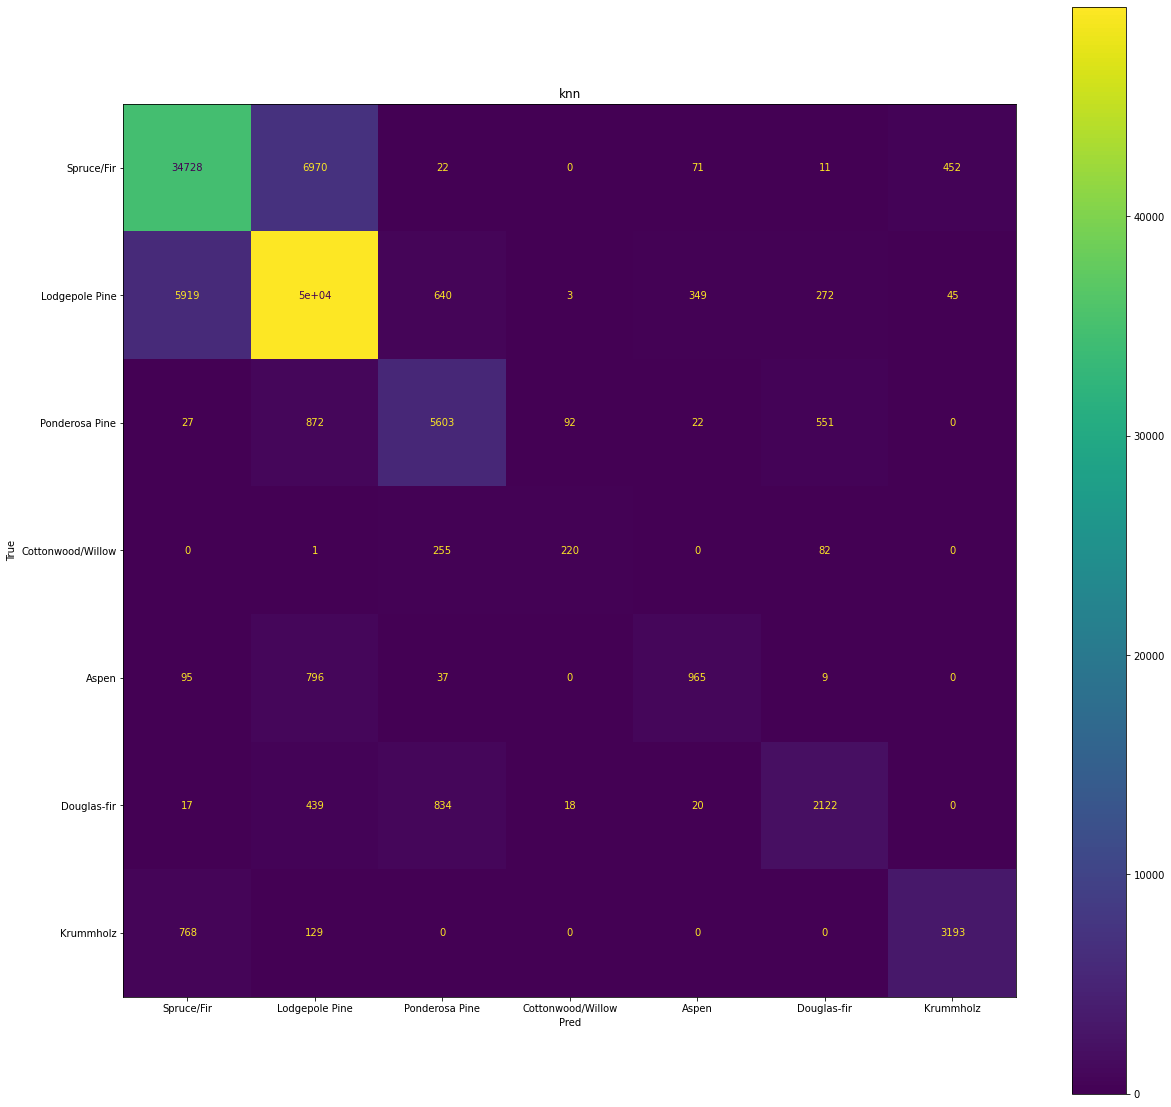

In [18]:
fig, ax = plt.subplots(1, 1,figsize=(20,20))
kNeigh = KNeighborsClassifier(n_neighbors=7)
kNeigh.fit(X_train_best, y_train)
kNeighPred = kNeigh.predict(X_test_best)
my_acc = metrics.accuracy_score(kNeighPred, y_test)
my_bAcc = metrics.balanced_accuracy_score(kNeighPred, y_test)
print(f'Accuracy          |{my_acc}')
print(f'bAccuracy         |{my_bAcc}') 
cm = metrics.confusion_matrix(y_test, kNeighPred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax) 
disp.ax_.set_title('knn')
disp.ax_.set_ylabel('True')
disp.ax_.set_xlabel('Pred')
disp.ax_.set_xticklabels(['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'])
disp.ax_.set_yticklabels(['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'])